## Crypto Arbitrage

This program will sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Then, apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

In [71]:
import pandas as pd
from pathlib import Path
import numpy as np

from datetime import datetime, timedelta

import ipywidgets as widgets
from IPython.display import display

# import matplotlib as mpl
# import matplotlib.pyplot as plt

import collection
import vizualization as vz
%matplotlib inline

## Collect the Data

In [72]:
bitstamp = collection.Data_Container()
bitstamp.df = bitstamp.read_csv(Path("Resources/bitstamp.csv"))
bitstamp.clean_data()

coinbase = collection.Data_Container()
coinbase.df =  coinbase.read_csv(Path("Resources/coinbase.csv"))
coinbase.clean_data()


## Analyze the Data

In [73]:
# Slice the DataFrames for the timestamp and 'Close' price 
bitstamp.slice_data()
bitstamp_sliced = bitstamp.sliced

coinbase.slice_data()
coinbase_sliced = coinbase.sliced

In [74]:
# Generate the summary statistics for the DataFrames
bitstamp_summary = bitstamp.df.describe(include='all')
coinbase_summary = coinbase.df.describe(include='all')


In [75]:
x1 = bitstamp_sliced.index
x2 = coinbase_sliced.index
y1 = bitstamp_sliced.values.tolist()
y2 = coinbase_sliced.values.tolist()

In [76]:
scale = widgets.FloatRangeSlider(
    value = [.75*min(y1), 1.25*max(y1)],
    min=.75*min(y1), 
    max=1.25*max(y1),
    description='Scale',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(height='350px')
)

bitstamp_checkbox = widgets.Checkbox(
    value=True,
    description='Bitstamp',
    disabled=False
)

coinbase_checkbox = widgets.Checkbox(
    value=True,
    description='Coinbase',
    disabled=False
)

date_slicer = widgets.IntRangeSlider(
    value=[0, len(x1)-1],
    min=0,
    max=len(x1)-1,
    step=1,
    description='Date Range',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

date_picker = widgets.IntSlider(
    value=int(round(len(x1)/2, 0)),
    min=date_slicer.value[0],
    max=date_slicer.value[1],
    description='Date Picker',
    readout=False,
    layout=widgets.Layout(width='900px')
    )

date_picker_1 = widgets.IntSlider(
    value=int(round(len(x1)/2, 0)),
    min=date_slicer.value[0],
    max=date_slicer.value[1],
    description='Date Picker',
    readout=False,
    layout=widgets.Layout(width='900px')
    )

date_picker_2 = widgets.IntSlider(
    value=int(round(len(x1)/2, 0)),
    min=date_slicer.value[0],
    max=date_slicer.value[1],
    description='Date Picker',
    readout=False,
    layout=widgets.Layout(width='900px')
    )

date_picker_3 = widgets.IntSlider(
    value=int(round(len(x1)/2, 0)),
    min=date_slicer.value[0],
    max=date_slicer.value[1],
    description='Date Picker',
    readout=False,
    layout=widgets.Layout(width='900px')
    )

date_picked = widgets.Text(
    f"{x1[date_picker.value]}",
    )

date_picked_1 = widgets.Text(
    f"{x1[date_picker_1.value]}",
    )

date_picked_2 = widgets.Text(
    f"{x1[date_picker_2.value]}",
    )

date_picked_3 = widgets.Text(
    f"{x1[date_picker_3.value]}",
    )


In [77]:
def main_plotter(date_picker_slider, range_slider, date_slicer, bitstamp_checkbox, coinbase_checkbox, scale):
    """
    A helper function to make a graph.
    """
    date_picker.min = date_slicer[0]
    date_picker.max = date_slicer[1]
    date_picked.value = f"{x1[date_picker_slider-1]}"

    vz.main_plotter(x1, y1, x2, y2, date_picker_slider, range_slider, date_slicer, bitstamp_checkbox, coinbase_checkbox, scale)

main_plot = widgets.interactive_output(
    main_plotter, 
    {
        'date_picker_slider': date_picker,
        'range_slider': scale,
        'date_slicer': date_slicer,
        'bitstamp_checkbox': bitstamp_checkbox,
        'coinbase_checkbox': coinbase_checkbox,
        'scale': scale,
        }
    )


In [78]:
def day_plotter(date_picker):
    vz.day_plotter(x1, y1, x2, y2, date_picker)
    
day_out = widgets.interactive_output(
    day_plotter,
    {
        'date_picker': date_picker,
    }
)

day_out_1 = widgets.interactive_output(
    day_plotter,
    {
        'date_picker': date_picker_1,
    }
)

day_out_2 = widgets.interactive_output(
    day_plotter,
    {
        'date_picker': date_picker_2,
    }
)

day_out_3 = widgets.interactive_output(
    day_plotter,
    {
        'date_picker': date_picker_3,
    }
)


In [79]:
def arbitrage_summary(date_picker):
    slice_start_date = x1[date_picker] - timedelta(days=.5)
    slice_end_date = slice_start_date + timedelta(days=1)

    bitstamp_sliced_date = bitstamp_sliced.loc[slice_start_date:slice_end_date]
    coinbase_sliced_date = coinbase_sliced.loc[slice_start_date:slice_end_date]
    # arbitrage_spread = bitstamp_sliced_date - coinbase_sliced_date

    print(f"\nArbitrage spread on {x1[date_picker_1.value].date()}")
    if (coinbase_sliced_date - bitstamp_sliced_date).mean() >= 0:
        # print("Coinbase averaged higher than Bitstamp")
        arbitrage_spread = coinbase_sliced_date - bitstamp_sliced_date
    else:
        # print("Bitstamp averaged higher than Coinbase")
        arbitrage_spread = bitstamp_sliced_date - coinbase_sliced_date

    vz.arbitrage_summary(arbitrage_spread)
    # display(arbitrage_spread.describe())

    
arbitrage_out = widgets.interactive_output(
    arbitrage_summary,
    {
        'date_picker': date_picker
    }
)

arbitrage_out_1 = widgets.interactive_output(
    arbitrage_summary,
    {
        'date_picker': date_picker_1
    }
)

arbitrage_out_2 = widgets.interactive_output(
    arbitrage_summary,
    {
        'date_picker': date_picker_2
    }
)

arbitrage_out_3 = widgets.interactive_output(
    arbitrage_summary,
    {
        'date_picker': date_picker_3
    }
)


In [80]:
tab_1_container = widgets.VBox(
    [
        widgets.HBox(
            [
                date_picker_1, 
                date_picked_1
            ]
        ), 
        widgets.HBox(
            [
                arbitrage_out_1, 
                day_out_1
            ]
        ), 
    ]
) 

tab_2_container = widgets.VBox(
    [
        widgets.HBox(
            [
                date_picker_2, 
                date_picked_2
            ]
        ), 
        widgets.HBox(
            [
                arbitrage_out_2, 
                day_out_2
            ]
        ), 
    ]
) 

tab_3_container = widgets.VBox(
    [
        widgets.HBox(
            [
                date_picker_3, 
                date_picked_3
            ]
        ), 
        widgets.HBox(
            [
                arbitrage_out_3, 
                day_out_3
            ]
        ), 
    ]
) 

tab_titles = ['First Tab', 'Second Tab', 'Third Tab']

children = [tab_1_container, tab_2_container, tab_3_container]
tab = widgets.Tab()
for i, t in enumerate(tab_titles):
    tab.set_title(i, t)
tab.children = children


In [93]:
widgets.VBox(
    [
        widgets.HBox([date_slicer, widgets.VBox([bitstamp_checkbox, coinbase_checkbox])]), 
        widgets.HBox([scale, main_plot]), 
        tab,
        ],
    )

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [105]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
def measure_arbitrage_spread(date_picked):
    slice_start_date = x1[date_picked] - timedelta(days=.5)
    slice_end_date = slice_start_date + timedelta(days=1)

    bitstamp_sliced_date = bitstamp_sliced.loc[slice_start_date:slice_end_date]
    coinbase_sliced_date = coinbase_sliced.loc[slice_start_date:slice_end_date]

    print(f"\nArbitrage spread on {x1[date_picked].date()}")
    if (coinbase_sliced_date - bitstamp_sliced_date).mean() >= 0:
        print("Coinbase averaged higher than Bitstamp")
        arbitrage_spread = coinbase_sliced_date - bitstamp_sliced_date
    else:
        print("Bitstamp averaged higher than Coinbase")
        arbitrage_spread = bitstamp_sliced_date - coinbase_sliced_date
    display(arbitrage_spread.describe())
    return arbitrage_spread

spread_1 = measure_arbitrage_spread(date_picker_1.value)
spread_2 = measure_arbitrage_spread(date_picker_2.value)
spread_3 = measure_arbitrage_spread(date_picker_3.value)



Arbitrage spread on 2018-01-30
Coinbase averaged higher than Bitstamp


count    1441.000000
mean        1.635017
std        23.564120
min       -62.820000
25%       -15.340000
50%        -0.090000
75%        16.590000
max       102.410000
Name: Close, dtype: float64


Arbitrage spread on 2018-02-14
Bitstamp averaged higher than Coinbase


count    1441.000000
mean        6.912026
std        15.084547
min       -33.620000
25%        -4.000000
50%         7.000000
75%        17.710000
max        59.930000
Name: Close, dtype: float64


Arbitrage spread on 2018-02-14
Bitstamp averaged higher than Coinbase


count    1441.000000
mean        6.912026
std        15.084547
min       -33.620000
25%        -4.000000
50%         7.000000
75%        17.710000
max        59.930000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [106]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

def calc_arbitrage_percent(df):
    if df['Bitstamp'] < df['Coinbase']:
        return 100 * df['Spread'] / df['Bitstamp']
    elif df['Bitstamp'] > df['Coinbase']:
        return 100 * df['Spread'] / df['Coinbase']
    else:
        return 0.00

def calc_spread_return(date_picked):
    slice_start_date = x1[date_picked] - timedelta(days=.5)
    slice_end_date = slice_start_date + timedelta(days=1)

    bitstamp_sliced_date = bitstamp_sliced.loc[slice_start_date:slice_end_date]
    coinbase_sliced_date = coinbase_sliced.loc[slice_start_date:slice_end_date]

    spread_return = pd.DataFrame(data=[bitstamp_sliced_date, coinbase_sliced_date], index=['Bitstamp', 'Coinbase']).T
    spread_return['Spread'] = (spread_return['Bitstamp'] - spread_return['Coinbase']).abs()
    spread_return['Return %'] = spread_return.apply(calc_arbitrage_percent, axis=1)

    # Review the spread return DataFrame
    print(100*'*' + f"\nSummary statistics for {slice_start_date}\n" + 100*'*')
    display(spread_return)

    return spread_return

spread_return_1 = calc_spread_return(date_picker_1.value)
spread_return_2 = calc_spread_return(date_picker_2.value)
spread_return_3 = calc_spread_return(date_picker_3.value)


****************************************************************************************************
Summary statistics for 2018-01-30 10:18:00
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-30 10:18:00,10471.00,10470.48,0.52,0.004966
2018-01-30 10:19:00,10488.41,10464.47,23.94,0.228774
2018-01-30 10:20:00,10405.40,10435.10,29.70,0.285429
2018-01-30 10:21:00,10366.00,10367.76,1.76,0.016979
2018-01-30 10:22:00,10301.00,10275.64,25.36,0.246797
...,...,...,...,...
2018-01-31 10:14:00,9942.01,9914.99,27.02,0.272517
2018-01-31 10:15:00,9921.36,9915.00,6.36,0.064145
2018-01-31 10:16:00,9880.00,9910.01,30.01,0.303745


****************************************************************************************************
Summary statistics for 2018-02-14 10:01:00
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-02-14 10:01:00,9214.26,9196.47,17.79,0.193444
2018-02-14 10:02:00,9230.38,9199.98,30.40,0.330436
2018-02-14 10:03:00,9228.35,9205.15,23.20,0.252033
2018-02-14 10:04:00,9243.90,9225.00,18.90,0.204878
2018-02-14 10:05:00,9233.03,9233.29,0.26,0.002816
...,...,...,...,...
2018-02-15 09:57:00,9881.41,9873.79,7.62,0.077174
2018-02-15 09:58:00,9866.79,9873.79,7.00,0.070945
2018-02-15 09:59:00,9881.23,9874.00,7.23,0.073223


****************************************************************************************************
Summary statistics for 2018-02-14 10:01:00
****************************************************************************************************


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-02-14 10:01:00,9214.26,9196.47,17.79,0.193444
2018-02-14 10:02:00,9230.38,9199.98,30.40,0.330436
2018-02-14 10:03:00,9228.35,9205.15,23.20,0.252033
2018-02-14 10:04:00,9243.90,9225.00,18.90,0.204878
2018-02-14 10:05:00,9233.03,9233.29,0.26,0.002816
...,...,...,...,...
2018-02-15 09:57:00,9881.41,9873.79,7.62,0.077174
2018-02-15 09:58:00,9866.79,9873.79,7.00,0.070945
2018-02-15 09:59:00,9881.23,9874.00,7.23,0.073223


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [107]:
# For each date in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
def calc_profitable_trades(spread_return):
    profitable_trades = spread_return.loc[spread_return['Return %'] > 1].copy()
    print(f"{profitable_trades['Spread'].count()} profitable trades")

    # Review the first five profitable trades
    display(profitable_trades.head())
    return profitable_trades

profitable_trades_1 = calc_profitable_trades(spread_return_1)
profitable_trades_2 = calc_profitable_trades(spread_return_2)
profitable_trades_3 = calc_profitable_trades(spread_return_3)


1 profitable trades


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-30 20:05:00,9519.01,9621.42,102.41,1.075847


0 profitable trades


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,


0 profitable trades


,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [108]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(spread_return_1.describe())
display(spread_return_2.describe())
display(spread_return_3.describe())


,Bitstamp,Coinbase,Spread,Return %
count,1441.000000,1441.000000,1441.000000,1441.000000
mean,10042.510687,10044.145704,18.536086,0.185587
std,189.578022,179.731904,14.632765,0.148328
min,9519.010000,9602.010000,0.000000,0.000000
25%,9900.670000,9905.980000,7.310000,0.072723
50%,10059.310000,10057.930000,16.000000,0.158545
75%,10170.000000,10157.390000,26.050000,0.259706
max,10488.410000,10470.480000,102.410000,1.075847


,Bitstamp,Coinbase,Spread,Return %
count,1441.000000,1441.000000,1441.000000,1441.000000
mean,9541.046780,9534.134754,13.390361,0.140731
std,211.503405,210.680943,9.794210,0.103375
min,9199.010000,9187.990000,0.000000,0.000000
25%,9314.960000,9312.990000,5.770000,0.060276
50%,9588.000000,9580.000000,11.570000,0.119795
75%,9717.040000,9714.990000,19.600000,0.204878
max,9971.500000,9965.260000,59.930000,0.634180


,Bitstamp,Coinbase,Spread,Return %
count,1441.000000,1441.000000,1441.000000,1441.000000
mean,9541.046780,9534.134754,13.390361,0.140731
std,211.503405,210.680943,9.794210,0.103375
min,9199.010000,9187.990000,0.000000,0.000000
25%,9314.960000,9312.990000,5.770000,0.060276
50%,9588.000000,9580.000000,11.570000,0.119795
75%,9717.040000,9714.990000,19.600000,0.204878
max,9971.500000,9965.260000,59.930000,0.634180


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [109]:
display(profitable_trades_1)

,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-30 20:05:00,9519.01,9621.42,102.41,1.075847


In [110]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
def calc_arbitrage_profit(df):
    if df['Bitstamp'] < df['Coinbase']:
        return df['Return %'] * df['Bitstamp'] / 100
    elif df['Bitstamp'] > df['Coinbase']:
        return df['Return %'] * df['Coinbase'] / 100
    else:
        return 0.00


print(100*'*'+f"\nArbitrage profits on {date_picked_1.value} \n")
display(profitable_trades_1)
if profitable_trades_1['Spread'].count() > 0:
    profit_1 = profitable_trades_1.apply(calc_arbitrage_profit, axis=1)
    profit_1.dropna()
    display(profit_1)
else:
    print("No profitable trades.")

print(100*'*'+f"\nArbitrage profits on {date_picked_1.value} \n")
if profitable_trades_2['Spread'].count() > 0:
    profit_2 = profitable_trades_2.apply(calc_arbitrage_profit, axis=1)
    profit_2.dropna()
    display(profit_2)
else:
    print("No profitable trades.")

print(100*'*'+f"\nArbitrage profits on {date_picked_1.value} \n")
if profitable_trades_3['Spread'].count() > 0:
    profit_3 = profitable_trades_3.apply(calc_arbitrage_profit, axis=1)
    profit_3.dropna()
    display(profit_3)
else:
    print("No profitable trades.")


****************************************************************************************************
Arbitrage profits on 2018-02-14 22:01:00 



,Bitstamp,Coinbase,Spread,Return %
Timestamp,,,,
2018-01-30 20:05:00,9519.01,9621.42,102.41,1.075847


Timestamp
2018-01-30 20:05:00    102.41
dtype: float64

****************************************************************************************************
Arbitrage profits on 2018-02-14 22:01:00 

No profitable trades.
****************************************************************************************************
Arbitrage profits on 2018-02-14 22:01:00 

No profitable trades.


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [111]:
# Generate the summary statistics for the early profit per trade DataFrame
print(100*'*'+f"\nProfit statistics from {date_picked_1.value} \n")
if profitable_trades_1['Spread'].count() > 0:
    display(profit_1.describe())
else:
    print("No profitable trades.")

# # Generate the summary statistics for the middle profit per trade DataFrame
# print(100*'*'+f"\nProfit statistics from {middle_start_date} \n")
# if profitable_trades_middle['Spread'].count() > 0:
#     display(profit_middle.describe())
# else:
#     print("No profitable trades.")

# # Generate the summary statistics for the late profit per trade DataFrame
# print(100*'*'+f"\nProfit statistics from {late_start_date} \n")
# if profitable_trades_late['Spread'].count() > 0:
#     display(profit_late.describe())
# else:
#     print("No profitable trades.")


****************************************************************************************************
Profit statistics from 2018-02-14 22:01:00 



count      1.00
mean     102.41
std         NaN
min      102.41
25%      102.41
50%      102.41
75%      102.41
max      102.41
dtype: float64

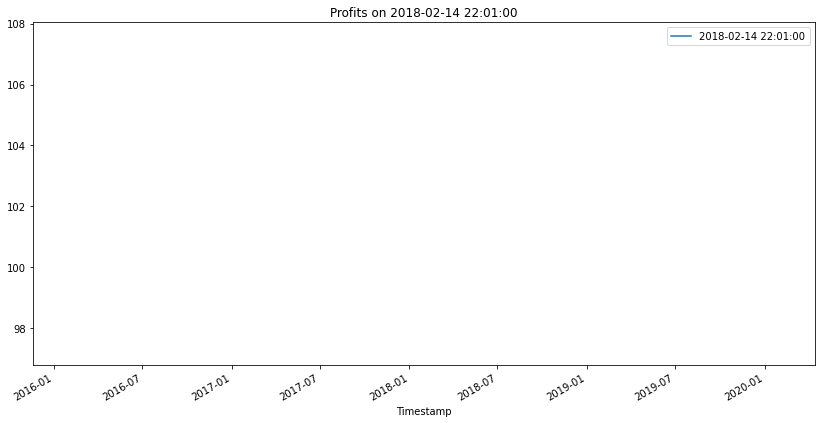

In [112]:
# Plot the results for the early profit per trade DataFrame
if profitable_trades_1['Spread'].count() > 0:
    title = f"Profits on {date_picked_1.value}"
    profit_1.plot(figsize=(14,7), title=title, legend=True, label=f"{date_picked_1.value}")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [113]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(f'Total profit on {date_picked_1.value}: ${profit_1.sum():,.2f}')
# print(f'Total profit on {date_picked_2.value}: ${profit_2.sum():,.2f}')
# print(f'Total profit on {date_picked_3.value}: ${profit_3.sum():,.2f}')



Total profit on 2018-02-14 22:01:00: $102.41


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [114]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_1 = np.cumsum(profit_1)
display(cumulative_profit_1)

# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
# cumulative_profit_middle = np.cumsum(profit_middle)
# display(cumulative_profit_middle)

# # Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
# cumulative_profit_late = np.cumsum(profit_late)
# display(cumulative_profit_late)

Timestamp
2018-01-30 20:05:00    102.41
dtype: float64

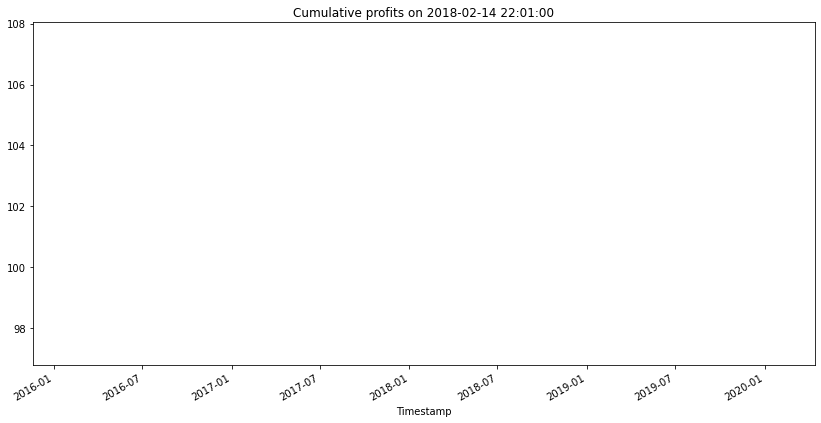

In [115]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
if profitable_trades_1['Spread'].count() > 0:
    cumulative_profit_1.plot(figsize=(14,7), title=f"Cumulative profits on {date_picked_1.value}")
else:
    print(f"No profitable trades on {date_picked_1.value}")